# Übung: Von linearer Regression zu neuronalen Netzen

In [1]:
import numpy as np
np.random.seed(seed=4)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import utils
# number of samples
num_samples=100

## Trainingsdaten

In [2]:
# get circle
x1_circ, x2_circ = utils.circle(1.0)

# get random points
x1 = np.random.rand(num_samples)
x2 = np.random.rand(num_samples)

# get points inside the circle
indeces_inside=np.where(x1**2 + x2**2 <= 1.0)
x1_in = x1[indeces_inside]
x2_in = x2[indeces_inside]

# get points outside the circle
indeces_outside=np.where(x1**2 + x2**2 >  1.0)
x1_out = x1[indeces_outside]
x2_out = x2[indeces_outside]

inputs, labels = utils.convert_to_training_data(x1_in, x2_in, x1_out, x2_out)

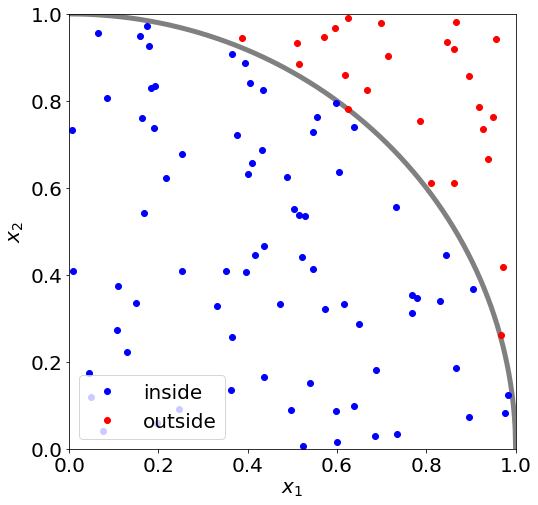

In [3]:
utils.plot_points(x1_circ, x2_circ, x1_in, x2_in, x1_out, x2_out)

## Lineare Regression

In [4]:
# Linear regression
def solve_linear_regression(inputs, labels):
    # calculate the coefficients
    theta = np.linalg.inv(inputs.T.dot(inputs)).dot(inputs.T).dot(labels)
    return(theta)

def predict_linear_regression(theta, x):
    a = theta.T.dot(x)
    return a[0]

theta = solve_linear_regression(inputs, labels)

Training accuracy: 97.000 % (97 of 100 points are correct)
Test accuracy:     95.980 % (9598 of 10000 points are correct)


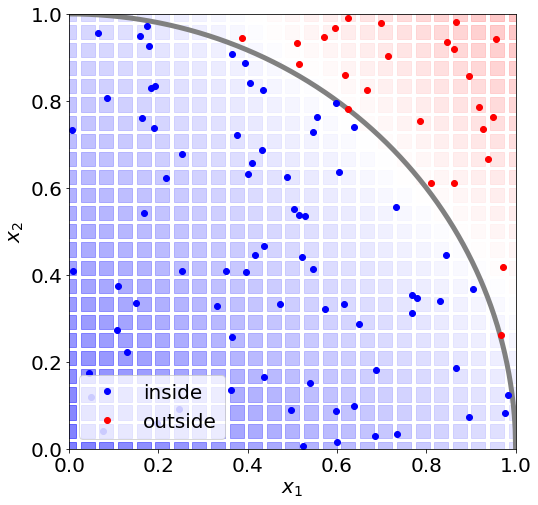

In [5]:
accuracy_training, accuracy_test, x1_test, x2_test, predictions = utils.test_model(theta, inputs, predict_linear_regression)
utils.plot_predictions(x1_circ, x2_circ, x1_in, x2_in, x1_out, x2_out, x1_test, x2_test, predictions)

## Logistische Regression

In [6]:
# Non-linear regression

def sigmoid(x):
    return(1.0/(1+np.exp(-x)))

def predict_nonlinear_regression(theta,x):
    h = weights.T.dot(x)
    a = sigmoid(h)
    return(a)

def dJ_over_dtheta(theta, x, y):
    m = len(x)
    h = weights.T.dot(x)
    a = sigmoid(h)
    dJ = 1/m * (a - y) * (a)*(1 - a) * x
    return(dJ)

def loss(theta, inputs, labels):
    m = len(inputs)
    J = 0.0
    for idx in range(m):
        a = predict_nonlinear_regression(theta, inputs[idx])
        y = labels[idx]
        J += 1/(2*m) * (a - y)**2
    return(J)


## Gradienten Abstiegsverfahren

In [7]:
weights=np.random.random(size=(3))
steps=10000
learning_rate=0.2
m = len(inputs)

for step in range(steps):
    # go through all training samples and add the changes
    dtheta=np.zeros((3))
    for idx in range(m):
        dloss_here = dJ_over_dtheta(weights, inputs[idx], labels[idx])
        dtheta += dloss_here
    
    weights -= learning_rate * dtheta
    # print loss
    if step==0 or (step+1)%1000 == 0:
        loss_here = loss(weights, inputs, labels)[0]
        print('Step %d / %d : loss = %.3f' %(step + 1, steps, loss_here ))
print('Finished optimization')


Step 1 / 10000 : loss = 0.109
Step 1000 / 10000 : loss = 0.020
Step 2000 / 10000 : loss = 0.017
Step 3000 / 10000 : loss = 0.016
Step 4000 / 10000 : loss = 0.016
Step 5000 / 10000 : loss = 0.015
Step 6000 / 10000 : loss = 0.015
Step 7000 / 10000 : loss = 0.015
Step 8000 / 10000 : loss = 0.015
Step 9000 / 10000 : loss = 0.014
Step 10000 / 10000 : loss = 0.014
Finished optimization


Training accuracy: 96.000 % (96 of 100 points are correct)
Test accuracy:     95.850 % (9585 of 10000 points are correct)


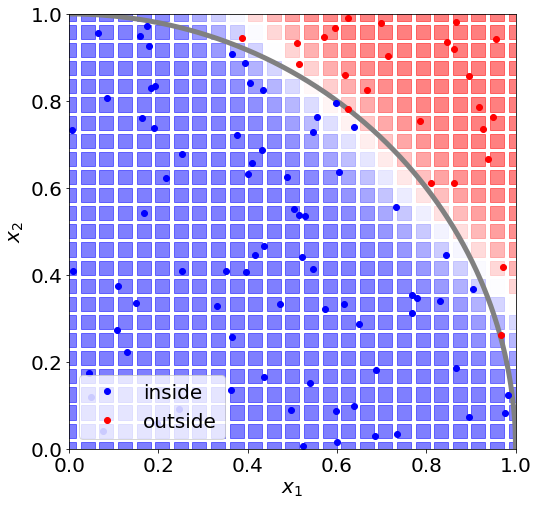

In [8]:
accuracy_training, accuracy_test, x1_test, x2_test, predictions = utils.test_model(theta, inputs, predict_nonlinear_regression)
utils.plot_predictions(x1_circ, x2_circ, x1_in, x2_in, x1_out, x2_out, x1_test, x2_test, predictions)

## Neuronale Netze mit pytorch

In [14]:
import torch
import torch.nn as nn
#import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 10)
        self.s1 = nn.Sigmoid()
        self.out = nn.Linear(10, 1)
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.s1(a1)
        a2 = self.out(h1)
        return a2
    
neural_net = Net()
optimizer = torch.optim.Adam(neural_net.parameters(), lr=0.01, betas=(0.9, 0.999))
loss_function = nn.MSELoss()

# convert training data to torch tensors
inputs_torch = torch.tensor(inputs, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)

In [15]:
# Do the training

epochs=50000
for epoch in range(epochs):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs_torch = neural_net(inputs_torch)
    loss_torch = loss_function(outputs_torch, labels_torch)
    loss_torch.backward()
    optimizer.step()

    # print statistics

    # print loss
    if epoch==0 or (epoch+1)%5000 == 0:
        print('Epoch %d / %d : loss = %.3f' %(epoch + 1, epochs, loss_torch))
print('Finished training')


Epoch 1 / 50000 : loss = 0.616
Epoch 5000 / 50000 : loss = 0.019
Epoch 10000 / 50000 : loss = 0.016
Epoch 15000 / 50000 : loss = 0.014
Epoch 20000 / 50000 : loss = 0.013
Epoch 25000 / 50000 : loss = 0.013
Epoch 30000 / 50000 : loss = 0.012
Epoch 35000 / 50000 : loss = 0.012
Epoch 40000 / 50000 : loss = 0.011
Epoch 45000 / 50000 : loss = 0.010
Epoch 50000 / 50000 : loss = 0.010
Finished training


Training accuracy: 100.000 % (100 of 100 points are correct)
Test accuracy:     98.190 % (9819 of 10000 points are correct)


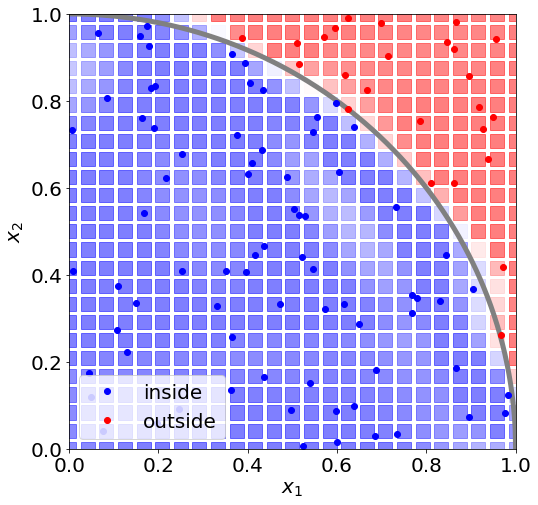

In [16]:
accuracy_training, accuracy_test, x1_test, x2_test, predictions = utils.test_model_nn(inputs, neural_net)
utils.plot_predictions_nn(x1_circ, x2_circ, x1_in, x2_in, x1_out, x2_out, x1_test, x2_test, predictions)